In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [2]:
## import file
frame = pd.read_excel('output.xlsx', sheetname='Sheet1')
frame.columns=frame.columns.astype(str).astype(int)


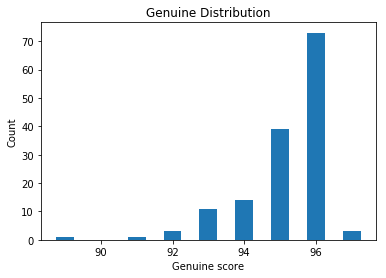

In [3]:
# Genuine Distribution

m=[frame[a][b] for a in frame.columns for b in frame .index if a==b]
n=[frame[a][b] for a in frame.columns for b in frame .index if a!=b]
from collections import Counter
xa=Counter(m)
ya=Counter(n)
x1=[i[0] for i in xa.items()]
y1=[i[1] for i in xa.items()]
plt.bar(x1,y1,width=0.5)
plt.xlabel("Genuine score")
plt.ylabel("Count")
plt.title("Genuine Distribution")
plt.show()
new_score=m+n
new_array=[]
for i in range(145):
    new_array.append(1)
for j in range(20880):
    new_array.append(0)

    

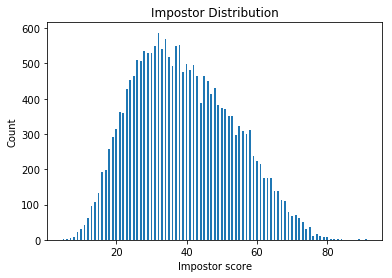

91
5


In [4]:
# Imposter Distribution

m=[frame[a][b] for a in frame.columns for b in frame .index if a==b]
n=[frame[a][b] for a in frame.columns for b in frame .index if a!=b]
from collections import Counter
xa=Counter(m)
ya=Counter(n)

x2=[i[0] for i in ya.items()]
y2=[i[1] for i in ya.items()]
plt.bar(x2,y2,width=0.5)
plt.xlabel("Impostor score")
plt.ylabel("Count")
plt.title("Impostor Distribution")
plt.show()
print(max(n))
print(min(n))

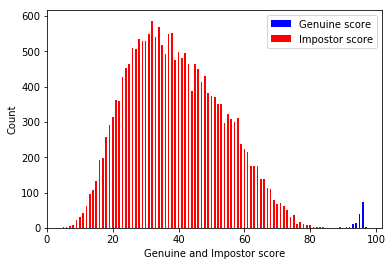

In [5]:
#Genuine and Imposter Distribution
plt.bar(x1,y1,width=0.5,color='blue',label='Genuine score')
plt.bar(x2,y2,width=0.5,color='red',label='Impostor score')
plt.xlabel("Genuine and Impostor score")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.savefig('Genuine_Imposter_Distribution.png')

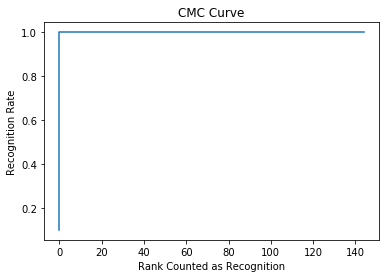

In [23]:
## plot CMC graphs

ads=[a for a in frame.columns for b in frame .index if a==b]
re={i:0 for i in range(145)}
for ad in ads:
    row=[a for a in frame[:][ad]]
    row=sorted(row)
    for i in range(145):
        if frame[ad][ad] in row[:i]:
            re[i]=re.get(i,0)+1
            

for i,j in re.items():
    re[i]=(145-j)/145
x=list(re.keys())
y=list(re.values())
x.insert(0,0)
y.insert(0,0.1)
plt.plot(x,y)
plt.xlabel("Rank Counted as Recognition")
plt.ylabel("Recognition Rate")
plt.title("CMC Curve")
plt.show()

In [7]:
def tmr(a,th):
    count=0
    for i in a:
        if i>=th:
            count +=1
    return count/(len(a)*1.0)
        
    

In [8]:
def fmr(b,th):
    count=0
    for i in b:
        if i>=th:
            count +=1
    return count/(len(b)*1.0)

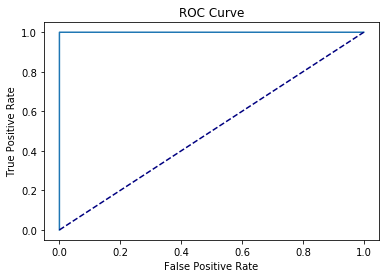

In [9]:
# plot ROC Curve
m=[frame[a][b] for a in frame.columns for b in frame .index if a==b]
n=[frame[a][b] for a in frame.columns for b in frame .index if a!=b]
re_a = [tmr(m,i) for i in py.arange(0,100,1)]
re_b=[fmr(n,i) for i in py.arange(0,100,1)]
plt.plot(re_b,re_a)
plt.plot([0,1],[0.,1],color="navy",linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [15]:
# plot ROC Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
y = np.array(new_array)
scores = np.array(new_score)
fpr, tpr, thresholds = metrics.roc_curve(y, scores,drop_intermediate=False)
print(fpr)
print(tpr)
print(thresholds)


[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.78927203e-05   9.57854406e-05
   1.43678161e-04   1.91570881e-04   2.87356322e-04   4.31034483e-04
   8.14176245e-04   1.24521073e-03   1.72413793e-03   2.49042146e-03
   3.06513410e-03   4.74137931e-03   6.27394636e-03   8.71647510e-03
   1.17337165e-02   1.50383142e-02   1.82950192e-02   2.20785441e-02
   2.73946360e-02   3.27586207e-02   3.94157088e-02   4.60249042e-02
   5.44540230e-02   6.28352490e-02   7.12164751e-02   8.15613027e-02
   9.22413793e-02   1.03639847e-01   1.18486590e-01   1.32854406e-01
   1.47557471e-01   1.62978927e-01   1.77155172e-01   1.93917625e-01
   2.10775862e-01   2.28591954e-01   2.46455939e-01   2.64750958e-01
   2.85296935e-01   3.05076628e-01   3.26628352e-01   3.48850575e-01
   3.67385057e-01   3.89655172e-01   4.13409962e-01   4.36446360e-01
   4.60296935e-01   4.83141762e-01   5.09530651e-01   5.35823755e-01
   5.59434866e-01   5.84291188e-01

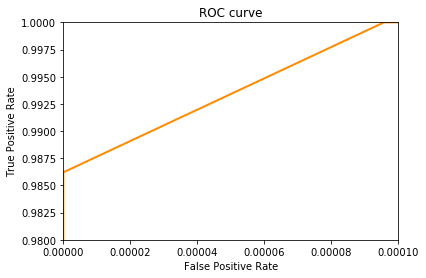

In [22]:
plt.figure()
lw = 2
plt.clf()
plt.plot(fpr, tpr, color='darkorange',lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0, 10e-05])
plt.ylim([0.98, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
#plt.legend(loc="lower right")
plt.show()